## Advanced Regression House Pricing Assignment
### Submitted By : Anushkumar K.

### PROBLEM STATEMENT:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

In [65]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

#### Performing the basic checks on the dataset

In [66]:
# Basic checks on the dataset

pricing_model = pd.read_csv('C:/Users/Anush/Documents/Python/Advanced_Regression_Assignment/train.csv')
pricing_model.shape

(1460, 81)

In [67]:
pricing_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [68]:
pricing_model.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
pricing_model.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the dataset for the null values

In [70]:
round(pricing_model.isnull().sum()/len(pricing_model.index),2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

#### Considering the 0.10 as the threshold for missing values, we will drop the columns with more than 0.10 missing values and the rest of the columns will be handled and imputed with the mean,median or mode values

In [71]:
round(pricing_model.isnull().sum()/len(pricing_model.index),2)[round(pricing_model.isnull().sum()/len(pricing_model.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [72]:
pricing_model = pricing_model.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [73]:
pricing_model.shape

(1460, 75)

In [74]:
round(pricing_model.isnull().sum()/len(pricing_model.index),2)[round(pricing_model.isnull().sum()/len(pricing_model.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### We will convert the Year column to a meaningful number like the age of the built so that we get a proper value when we compare with the other variables.

In [75]:
pricing_model['YearBuilt_Old']=pricing_model.YearBuilt.max()-pricing_model.YearBuilt
pricing_model['YearRemodAdd_Old']=pricing_model.YearRemodAdd.max()-pricing_model.YearRemodAdd
pricing_model['GarageYrBlt_Old']=pricing_model.GarageYrBlt.max()-pricing_model.GarageYrBlt
pricing_model['YrSold_Old']=pricing_model.YrSold.max()-pricing_model.YrSold
pricing_model[['YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']].sample(5)

,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
903,4,4,4.0,4
1342,8,8,8.0,3
937,5,5,5.0,1
518,12,12,12.0,3
1104,40,40,40.0,3


#### Dropping the actual year column

In [76]:
pricing_model = pricing_model.drop(['YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old'],axis='columns')
pricing_model.shape

(1460, 75)

#### Imputing the missing values

In [77]:
pricing_model.MasVnrType.fillna('None',inplace=True)
pricing_model.MasVnrArea.fillna(pricing_model.MasVnrArea.mean(),inplace=True)
pricing_model.BsmtQual.fillna('TA',inplace=True)
pricing_model.BsmtCond.fillna('TA',inplace=True)
pricing_model.BsmtExposure.fillna('No',inplace=True)
pricing_model.BsmtFinType1.fillna('Unf',inplace=True)
pricing_model.BsmtFinType2.fillna('Unf',inplace=True)
pricing_model.GarageType.fillna('Attchd',inplace=True)
pricing_model.GarageYrBlt.fillna(-1,inplace=True)
pricing_model.GarageFinish.fillna('Unf',inplace=True)
pricing_model.GarageQual.fillna('TA',inplace=True)
pricing_model.GarageCond.fillna('TA',inplace=True)

#### Dropping few more non-significant columns

In [78]:
pricing_model.Street.value_counts()
pricing_model.Utilities.value_counts()
pricing_model=pricing_model.drop(['Id','Street','Utilities'],axis='columns')
pricing_model.shape

(1460, 72)

#### Now we will do the Exploratory Data Analysis for some of the variables in the data set and we will identify the correlation heatmap for those variables in dataset

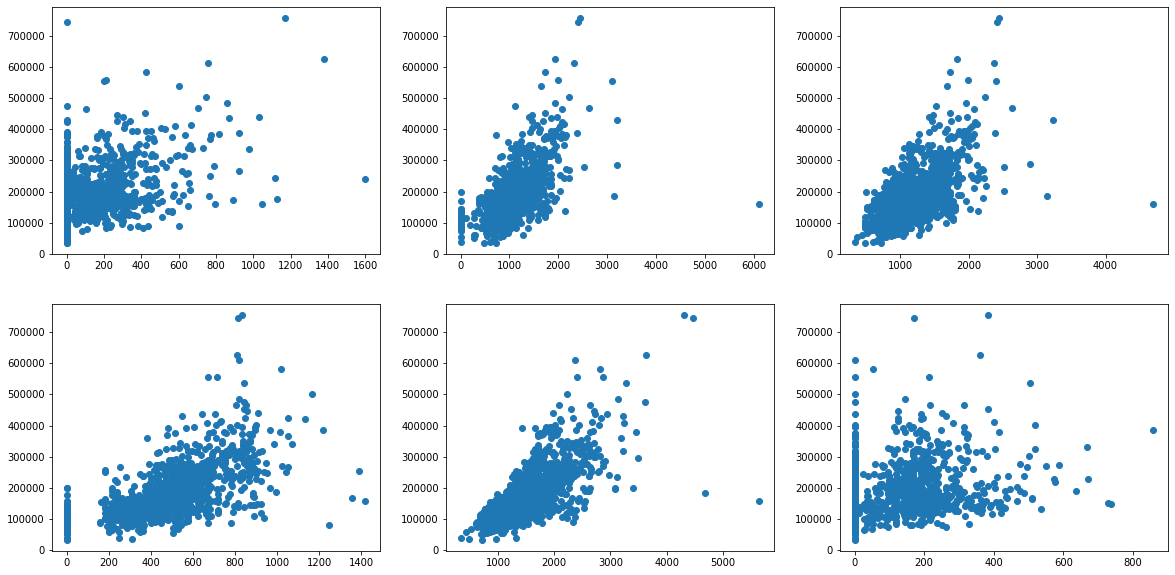

In [79]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(pricing_model.MasVnrArea,pricing_model.SalePrice)
plt.subplot(2,3,2)
plt.scatter(pricing_model.TotalBsmtSF,pricing_model.SalePrice)
plt.subplot(2,3,3)
plt.scatter(pricing_model['1stFlrSF'],pricing_model.SalePrice)
plt.subplot(2,3,4)
plt.scatter(pricing_model['GarageArea'],pricing_model.SalePrice)
plt.subplot(2,3,5)
plt.scatter(pricing_model['GrLivArea'],pricing_model.SalePrice)
plt.subplot(2,3,6)
plt.scatter(pricing_model['WoodDeckSF'],pricing_model.SalePrice)

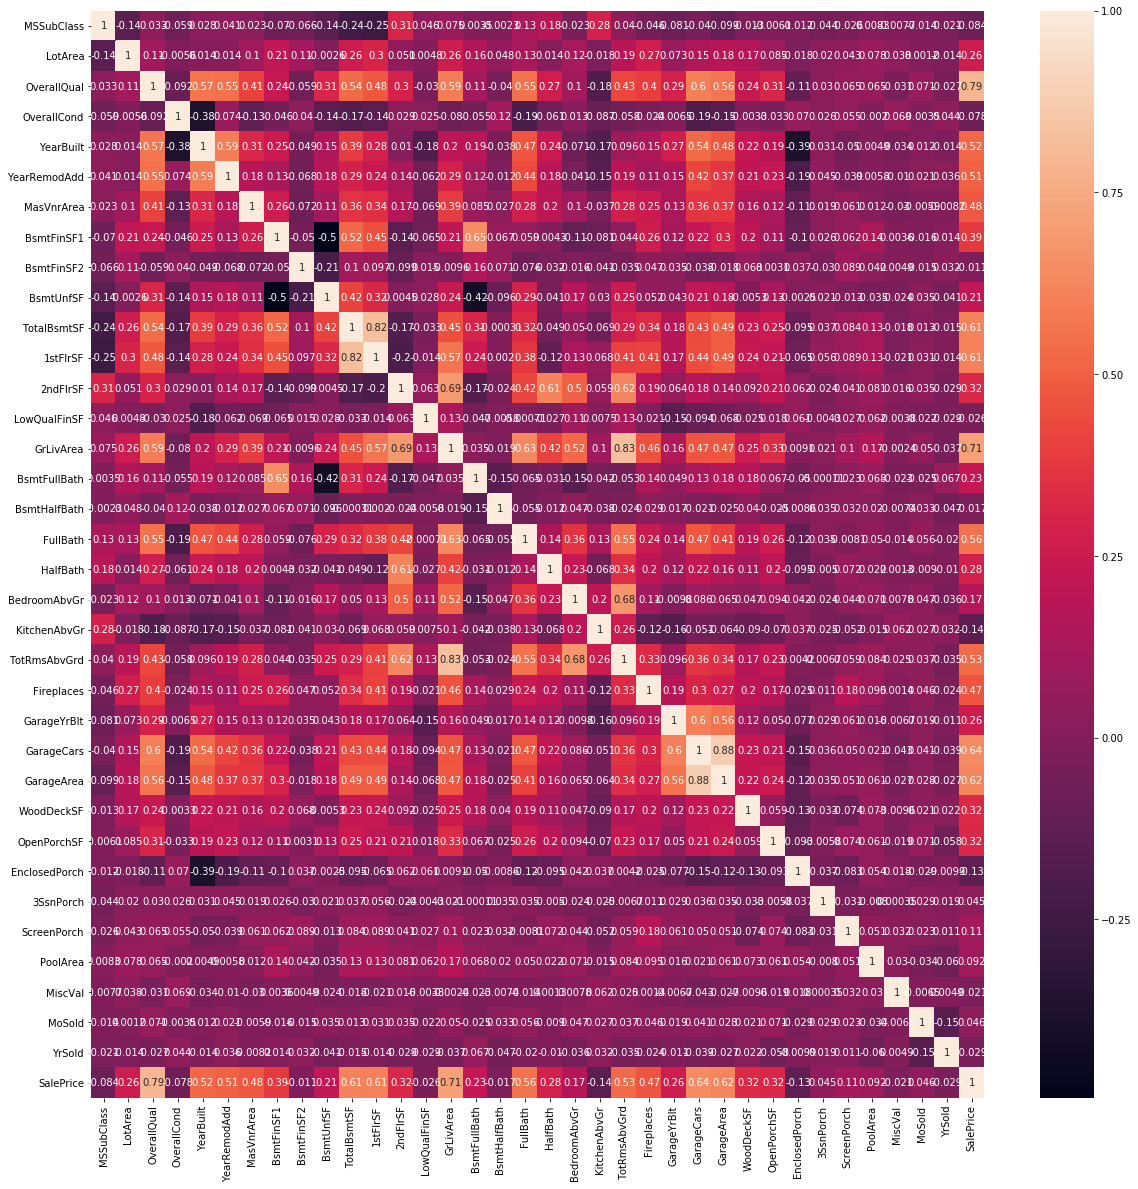

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(pricing_model[list(pricing_model.dtypes[pricing_model.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [81]:
pricing_model.shape

(1460, 72)

In [82]:
number_of_columns = list(pricing_model.dtypes[pricing_model.dtypes!='object'].index)
number_of_columns = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
def treat_outliers(x):
    list=[]
    for col in number_of_columns:
        Q1=x[col].quantile(.25)
        Q3=x[col].quantile(.99)
        IQR=Q3-Q1
        x=x[(x[col]>=(Q1-(1.5*IQR))) & (x[col]<=(Q3+(1.5*IQR)))]
    return x
pricing_model = treat_outliers(pricing_model)
pricing_model.shape

(1441, 72)

In [83]:
pricing_model[list(pricing_model.dtypes[pricing_model.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Checking for the other columns except above if they have similar kind of values so that they are ordinal in nature.

In [84]:
pricing_model[['LandSlope','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [85]:
pricing_model['LandSlope']=pricing_model.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
pricing_model['ExterQual']=pricing_model.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
pricing_model['BsmtQual']=pricing_model.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
pricing_model['BsmtCond']=pricing_model.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
pricing_model['BsmtExposure']=pricing_model.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
pricing_model['BsmtFinType1']=pricing_model.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
pricing_model['BsmtFinType2']=pricing_model.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
pricing_model['HeatingQC']=pricing_model.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
pricing_model['CentralAir']=pricing_model.CentralAir.map({'N':0,'Y':1})
pricing_model['KitchenQual']=pricing_model.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
pricing_model['GarageFinish']=pricing_model.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
pricing_model['GarageQual']=pricing_model.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
pricing_model['GarageCond']=pricing_model.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
pricing_model['ExterCond']=pricing_model.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
pricing_model['LotShape']=pricing_model.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [86]:
pricing_model[['LandSlope','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,6,1,4,1,3,2,3,3,2,0


#### Joining the dummy columns to the dataset

In [87]:
dummy_columns=pd.get_dummies(pricing_model[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],drop_first=True)
pricing_model = pd.concat([pricing_model,dummy_columns],axis='columns')
pricing_model=pricing_model.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

#### Distribution of the target variable before scaling and splitting to test and train datasets

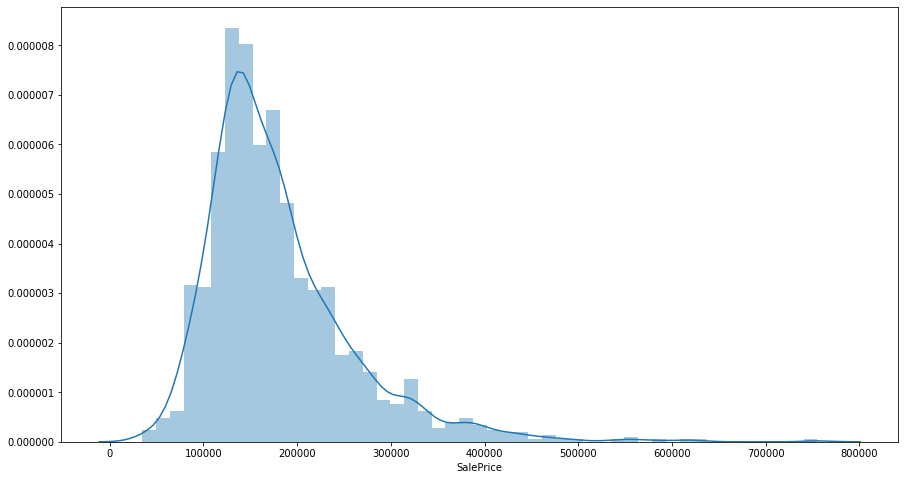

In [88]:
plt.figure(figsize=(15,8))
sns.distplot(pricing_model.SalePrice)
plt.show()

#### Creating the train and test datasets for validations

In [89]:
df_train,df_test = train_test_split(pricing_model,train_size=0.7,test_size=0.3,random_state=42)
pricing_model[['LandSlope','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset.

In [90]:
number_of_cols=['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
                'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
scaler=StandardScaler()
df_train[number_of_cols]=scaler.fit_transform(df_train[number_of_cols])
df_test[number_of_cols]=scaler.fit_transform(df_test[number_of_cols])

#### Disribution of test and train datasets after scaling

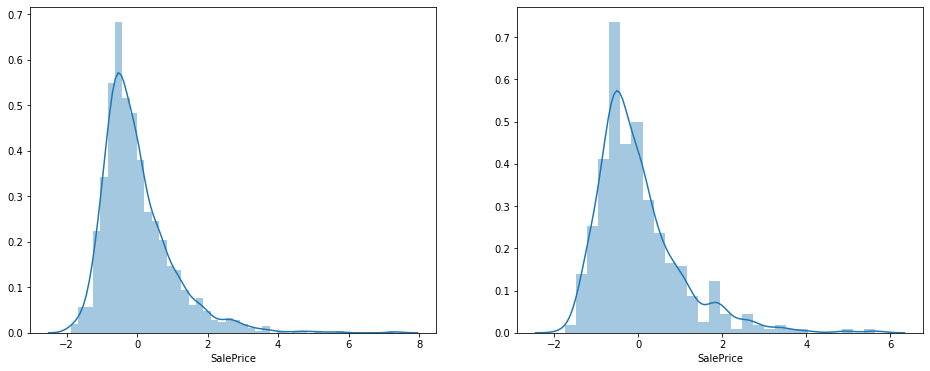

In [91]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Popping out the dependent variable SalePrice

In [92]:
y_train=df_train.pop('SalePrice')
X_train=df_train
y_test=df_test.pop('SalePrice')
X_test=df_test

In [93]:
# Number of columns in x_train
len(X_train.columns)

193

In [112]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,50)
rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False  True  True  True  True False False False
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
 False False  True  True  True  True  True  True  True  True False False
 False  True False  True  True  True  True  True False  True]
[ 1  1  1  1  1  1  1  1  1  1  1 17  7 14  8  9  6  1  1  1  1 19 20 18
  1  1  1 10  1  1 21  1  1  1  1  1  1  1  1  1  1 11  1  1  5  1  1  1
  4  2  1  1  1  1  1  1  1  1 16 13 12  1 15  1  1  1  1  1  3  1]


In [113]:
rfe_score=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_score.columns=['Column_Names','Status','Rank']
rfe_sel_columns=list(rfe_score[rfe_score.Status==True].Column_Names)
X_train=X_train[rfe_sel_columns]
X_test=X_test[rfe_sel_columns]

#### Applying Lasso Regression Model

In [114]:
hyper_params={'alpha':[0.0001,0.001,0.01,0.1,0.05,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
folds=5

In [115]:
# Applying lasso regression
lasso=Lasso()
model_cval=GridSearchCV(estimator=lasso,param_grid=hyper_params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cval.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.05, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [116]:
cv_results=pd.DataFrame(model_cval.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043002,0.038144,0.0018,3.999710e-04,0.0001,{'alpha': 0.0001},-0.255835,-0.266117,-0.250886,-0.276982,...,-0.259984,0.010224,2,-0.233663,-0.230522,-0.237605,-0.227725,-0.235080,-0.232919,0.003461
1,0.045803,0.008931,0.0020,6.324097e-04,0.001,{'alpha': 0.001},-0.252927,-0.262151,-0.246094,-0.273381,...,-0.256890,0.009793,1,-0.238630,-0.236686,-0.243731,-0.230526,-0.239158,-0.237746,0.004286
2,0.011201,0.004665,0.0020,0.000000e+00,0.01,{'alpha': 0.01},-0.268832,-0.266432,-0.251851,-0.296086,...,-0.273616,0.015382,3,-0.266795,-0.265195,-0.271324,-0.259303,-0.262700,-0.265063,0.004024
3,0.006000,0.000895,0.0018,3.999949e-04,0.1,{'alpha': 0.1},-0.293967,-0.282768,-0.267200,-0.327647,...,-0.306377,0.033589,5,-0.306621,-0.304167,-0.305102,-0.299133,-0.302375,-0.303480,0.002572
4,0.005600,0.000490,0.0016,4.898624e-04,0.05,{'alpha': 0.05},-0.282383,-0.273133,-0.255370,-0.308480,...,-0.288913,0.025037,4,-0.287055,-0.286029,-0.290985,-0.277100,-0.280597,-0.284353,0.004916
5,0.006000,0.000633,0.0020,1.168008e-07,0.2,{'alpha': 0.2},-0.330169,-0.318685,-0.301724,-0.369173,...,-0.349694,0.045461,6,-0.348713,-0.350498,-0.339891,-0.342129,-0.348454,-0.345937,0.004145
6,0.005400,0.000490,0.0020,1.168008e-07,0.3,{'alpha': 0.3},-0.386137,-0.372454,-0.351752,-0.417800,...,-0.406505,0.053602,7,-0.404382,-0.407023,-0.392013,-0.398325,-0.404836,-0.401316,0.005475
7,0.005200,0.000748,0.0024,4.898624e-04,0.4,{'alpha': 0.4},-0.457886,-0.428374,-0.411526,-0.477210,...,-0.471290,0.059777,8,-0.470575,-0.469583,-0.457671,-0.466534,-0.469454,-0.466763,0.004742
8,0.005600,0.000490,0.0014,4.899403e-04,0.5,{'alpha': 0.5},-0.526594,-0.483902,-0.482227,-0.539808,...,-0.536996,0.062246,9,-0.534425,-0.532690,-0.531715,-0.533494,-0.534288,-0.533322,0.001016
9,0.005200,0.000748,0.0020,6.325605e-04,0.6,{'alpha': 0.6},-0.603386,-0.547408,-0.553772,-0.608774,...,-0.603372,0.056102,10,-0.603672,-0.601364,-0.603297,-0.605101,-0.592317,-0.601150,0.004575


In [117]:
# Finding the optimum alpha and r2 value for the train and test models
model_cval1=GridSearchCV(estimator=lasso,param_grid=hyper_params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cval1.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.05, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [118]:
cv_results1=pd.DataFrame(model_cval1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057203,4.845645e-02,0.0026,4.899014e-04,0.0001,{'alpha': 0.0001},0.852712,0.755722,0.741353,0.848586,...,0.821843,0.064093,2,0.893197,0.899317,0.898846,0.891736,0.874299,0.891479,0.009098
1,0.039202,6.615429e-03,0.0020,6.325605e-04,0.001,{'alpha': 0.001},0.850066,0.790978,0.721087,0.851058,...,0.823738,0.062971,1,0.888079,0.893690,0.892548,0.887680,0.868373,0.886074,0.009164
2,0.009801,1.166327e-03,0.0024,8.000136e-04,0.01,{'alpha': 0.01},0.825407,0.845379,0.684688,0.826771,...,0.807595,0.062599,3,0.834410,0.832625,0.859921,0.832295,0.818680,0.835586,0.013409
3,0.006000,1.265083e-03,0.0020,1.507891e-07,0.1,{'alpha': 0.1},0.764812,0.800432,0.726562,0.780350,...,0.767225,0.024288,5,0.783437,0.779286,0.802522,0.776317,0.761975,0.780707,0.013081
4,0.007000,6.323343e-04,0.0022,4.000425e-04,0.05,{'alpha': 0.05},0.794423,0.824698,0.716212,0.810127,...,0.791757,0.039043,4,0.808850,0.805749,0.830965,0.807135,0.791300,0.808800,0.012725
5,0.006000,6.325605e-04,0.0020,9.536743e-08,0.2,{'alpha': 0.2},0.702655,0.732370,0.721247,0.707592,...,0.705152,0.024071,6,0.719953,0.714504,0.739961,0.712336,0.691338,0.715619,0.015575
6,0.005400,7.999659e-04,0.0026,4.898819e-04,0.3,{'alpha': 0.3},0.619797,0.639096,0.680711,0.620692,...,0.621235,0.043784,7,0.634880,0.632202,0.654901,0.629520,0.600198,0.630340,0.017530
7,0.004000,9.536743e-08,0.0020,1.168008e-07,0.4,{'alpha': 0.4},0.518227,0.540310,0.608678,0.516796,...,0.520281,0.061499,8,0.530815,0.539974,0.553560,0.525309,0.489179,0.527768,0.021535
8,0.005200,9.798709e-04,0.0016,8.000255e-04,0.5,{'alpha': 0.5},0.409290,0.438670,0.495440,0.400214,...,0.406100,0.068444,9,0.417955,0.434612,0.426669,0.408443,0.366763,0.410889,0.023727
9,0.004600,8.000612e-04,0.0022,4.000187e-04,0.6,{'alpha': 0.6},0.276787,0.313706,0.347146,0.261413,...,0.276173,0.055958,10,0.280895,0.305836,0.291650,0.269017,0.247802,0.279040,0.019783


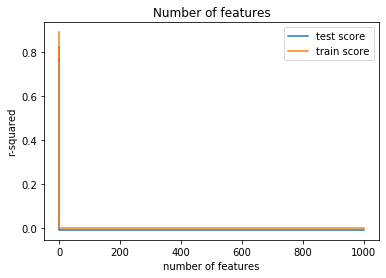

In [153]:
# Plotting the cv_results
cv_results1['param_alpha']=cv_results1['param_alpha'].astype('int32')
#plt.figure(figsize=(16,6))
plt.plot(cv_results1['param_alpha'],cv_results1['mean_test_score'])
plt.plot(cv_results1['param_alpha'],cv_results1['mean_train_score'])
plt.xlabel('number of features')
#plt.xscale('log')
plt.ylabel('r-squared')
#plt.yscale('log')
plt.title('Number of features')
plt.legend(['test score','train score'],loc='upper right')

In [154]:
print(model_cval.best_params_)
print(model_cval.best_score_)

{'alpha': 0.001}
-0.25688961674768074


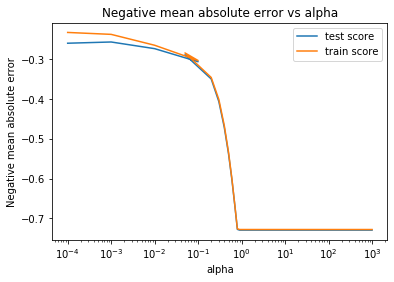

In [155]:
# plt.figure(figsize=(16,6))
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Negative mean absolute error')
plt.title('Negative mean absolute error vs alpha')
plt.legend(['test score','train score'],loc='upper right')
plt.show()

In [126]:
alpha=0.001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [128]:
# predicting the r2 value
from sklearn import metrics
y_train_pred=lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

0.8820473850165268


In [129]:
y_test_pred=lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8443422435571701


In [130]:
model_param=list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols=df_train.columns
cols.insert(0,'const')
lasso_coef=pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns=['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
30,BedroomAbvGr,1.517129
18,BsmtUnfSF,0.521554
47,MiscVal,0.411210
17,BsmtFinSF2,0.408148
10,ExterCond,0.339602
15,BsmtFinSF1,0.305323
19,TotalBsmtSF,0.255821
1,LotArea,0.247341
12,BsmtCond,0.215508
2,LotShape,0.206326


#### Implementing the Ridge regression

In [131]:
ridge=Ridge()
model_cval2=GridSearchCV(estimator=ridge,param_grid=hyper_params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cval2.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.05, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [132]:
cv_results2=pd.DataFrame(model_cval2.cv_results_)
cv_results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128207,2.269785e-01,0.0018,3.998995e-04,0.0001,{'alpha': 0.0001},-0.256480,-0.266679,-0.252824,-0.277201,...,-0.260645,0.010000,24,-0.233426,-0.229780,-0.237022,-0.227656,-0.234571,-0.232491,0.003360
1,0.004800,4.000187e-04,0.0012,3.998995e-04,0.001,{'alpha': 0.001},-0.256474,-0.266641,-0.252809,-0.277193,...,-0.260631,0.009995,23,-0.233428,-0.229787,-0.237027,-0.227657,-0.234572,-0.232494,0.003361
2,0.004400,4.898819e-04,0.0016,4.899792e-04,0.01,{'alpha': 0.01},-0.256412,-0.266267,-0.252655,-0.277109,...,-0.260500,0.009949,22,-0.233447,-0.229847,-0.237080,-0.227661,-0.234579,-0.232522,0.003366
3,0.005400,4.899014e-04,0.0020,9.536743e-08,0.1,{'alpha': 0.1},-0.255841,-0.262921,-0.251374,-0.276341,...,-0.259332,0.009589,20,-0.233615,-0.230401,-0.237535,-0.227697,-0.234625,-0.232775,0.003412
4,0.004800,7.483665e-04,0.0016,4.899014e-04,0.05,{'alpha': 0.05},-0.256149,-0.264697,-0.252029,-0.276747,...,-0.259947,0.009768,21,-0.233525,-0.230105,-0.237295,-0.227676,-0.234604,-0.232641,0.003388
5,0.004200,4.000664e-04,0.0014,4.899403e-04,0.2,{'alpha': 0.2},-0.255288,-0.259841,-0.250521,-0.275618,...,-0.258319,0.009315,19,-0.233768,-0.230956,-0.237927,-0.227732,-0.234678,-0.233012,0.003453
6,0.005400,4.899403e-04,0.0016,4.899598e-04,0.3,{'alpha': 0.3},-0.254854,-0.257264,-0.250051,-0.274956,...,-0.257513,0.009115,18,-0.233905,-0.231527,-0.238255,-0.227772,-0.234737,-0.233239,0.003483
7,0.005200,7.483919e-04,0.0016,4.899792e-04,0.4,{'alpha': 0.4},-0.254472,-0.255084,-0.249686,-0.274344,...,-0.256825,0.008993,17,-0.234016,-0.232088,-0.238521,-0.227809,-0.234774,-0.233442,0.003506
8,0.005200,9.799974e-04,0.0024,4.898819e-04,0.5,{'alpha': 0.5},-0.254133,-0.253206,-0.249400,-0.273774,...,-0.256229,0.008919,16,-0.234121,-0.232595,-0.238751,-0.227841,-0.234789,-0.233619,0.003533
9,0.005800,4.001141e-04,0.0022,4.000664e-04,0.6,{'alpha': 0.6},-0.253829,-0.251570,-0.249165,-0.273242,...,-0.255706,0.008880,15,-0.234211,-0.233049,-0.238970,-0.227864,-0.234804,-0.233780,0.003569


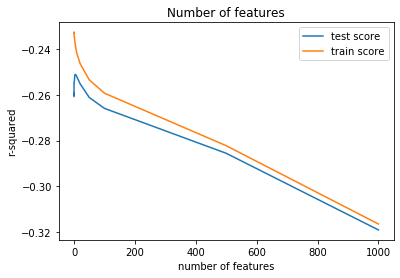

In [133]:
# Plotting the cv_results
cv_results2['param_alpha']=cv_results2['param_alpha'].astype('int32')
#plt.figure(figsize=(16,6))
plt.plot(cv_results2['param_alpha'],cv_results2['mean_test_score'])
plt.plot(cv_results2['param_alpha'],cv_results2['mean_train_score'])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title('Number of features')
plt.legend(['test score','train score'],loc='upper right')

In [135]:
print(model_cval2.best_params_)
print(model_cval2.best_score_)

{'alpha': 4.0}
-0.2510060748229737


In [138]:
alpha1=4
ridge=Ridge(alpha=alpha1)
ridge.fit(X_train,y_train)
ridge.coef_

array([ 0.25007312,  0.20462433,  0.12858423,  0.03044691, -0.03411855,
        0.1113076 ,  0.11933933,  0.12573575, -0.00718163,  0.19206611,
        0.16008003,  0.21379398,  0.07124501,  0.03999244,  0.29739771,
        0.13214772,  0.40060598,  0.48657409,  0.25620642, -0.15466874,
       -0.85536723, -0.30189277, -0.26892754, -0.06588102, -0.27120341,
        0.06162207,  0.12262646,  0.03588967, -0.062902  ,  0.87355081,
       -0.00309848, -0.09177353, -0.08506068, -0.09257012, -0.00309848,
       -0.11021685,  0.02724725, -0.09397189, -0.03430177,  0.10102641,
       -0.09270363, -0.18299613,  0.1747973 , -0.01874549,  0.08350606,
       -0.12940018,  0.2865867 ,  0.10534115,  0.13513275,  0.11176622])

In [139]:
y_train_pred1=ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred1))

0.8751892809406496


In [141]:
y_test_pred1=ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred1))

0.8506669447409838


In [145]:
model_param1=list(ridge.coef_)
model_param1.insert(0,ridge.intercept_)
cols1=df_train.columns
cols1.insert(0,'const')
lasso_coef1=pd.DataFrame(list(zip(cols1,model_param1)))
lasso_coef1.columns=['Feature','Ridge_Coef']
lasso_coef1.sort_values(by='Ridge_Coef',ascending=False).head(10)

,Feature,Ridge_Coef
30,BedroomAbvGr,0.873551
18,BsmtUnfSF,0.486574
17,BsmtFinSF2,0.400606
15,BsmtFinSF1,0.297398
47,MiscVal,0.286587
19,TotalBsmtSF,0.256206
1,LotArea,0.250073
12,BsmtCond,0.213794
2,LotShape,0.204624
10,ExterCond,0.192066


## Conclusion:
Based on the above models on Lasso and Ridge, we could observe that the R2 values of both regression models corresponds to **0.844** and **0.85** respectively. 
#### But considering the fact that the Lasso regression model penalizes more on the dataset for variables and it also helps in feature elimination. Thus number of variables is reduced and an efficient model can be built for the dataset.

### Therfore we can consider the Lasso Regression model which has the optimum alpha value as 0.001

The alpha value for **Lasso regression** is **0.001** and the alpha value for **Ridge regression** is **4** as per our model.

From the above since we have considered the Lasso regression model as our implementation model, below are the variables which are significant for the model based on the coefficient values:

#### 1.BedroomAbvGr
#### 2.BsmtUnfSF
#### 3.MiscVal
#### 4.BsmtFinSF2
#### 5.ExterCond